In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [73]:
data = pd.read_csv('clustering.csv')
# print(data)
newdataframe = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
# print(newdataframe)
X = newdataframe.values
print(X)

[[4583.  128.]
 [3000.   66.]
 [2583.  120.]
 [6000.  141.]
 [2333.   95.]
 [3200.   70.]
 [2500.  109.]
 [1853.  114.]
 [1299.   17.]
 [4950.  125.]
 [3596.  100.]
 [3510.   76.]
 [4887.  133.]
 [2600.  115.]
 [7660.  104.]
 [2600.  116.]
 [3365.  112.]
 [2799.  122.]
 [4226.  110.]
 [1442.   35.]
 [3750.  120.]
 [3167.   74.]
 [4692.  106.]
 [3500.  114.]
 [1828.  100.]
 [3667.  144.]
 [3748.  110.]
 [3600.   80.]
 [1800.   47.]
 [2400.   75.]
 [3941.  134.]
 [4695.   96.]
 [3410.   88.]
 [5649.   44.]
 [5821.  144.]
 [2645.  120.]
 [4000.  144.]
 [1928.  100.]
 [3086.  120.]
 [4230.  112.]
 [4616.  134.]
 [2708.   97.]
 [2132.   96.]
 [3366.  135.]
 [3357.  144.]
 [2500.  120.]
 [3029.   99.]
 [4166.  116.]
 [3200.  126.]
 [7100.  125.]
 [4300.  136.]
 [1875.   97.]
 [3500.   81.]
 [4755.   95.]
 [3750.  113.]
 [1000.  110.]
 [3333.  130.]
 [3846.  111.]
 [3988.   50.]
 [2366.  136.]
 [3333.   99.]
 [2500.  104.]
 [2958.  131.]
 [3273.   81.]
 [4133.  122.]
 [3620.   25.]
 [2484.  1

C:\Users\eregn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


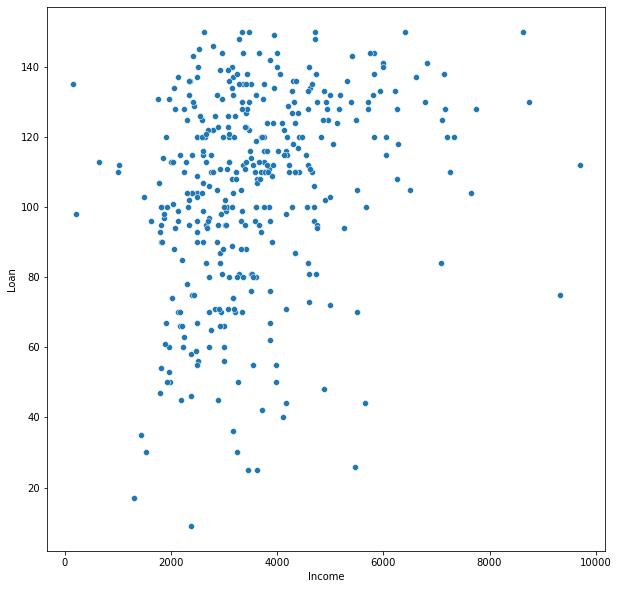

In [74]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [75]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [79]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroids - new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster


In [80]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [81]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

ValueError: All arrays must be of the same length